<a href="https://colab.research.google.com/github/kennethtxytqw/nn_mnist-yidu-workshop/blob/master/nn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Tensorflow Workshop
![MNIST](https://cdn-images-1.medium.com/max/1200/1*9Mjoc_J0JR294YwHGXwCeg.jpeg)

In [0]:
# Import MNIST data
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf
tf.logging.set_verbosity(0)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# print the data shape
print('The shape of x_train is: ', x_train.shape)
print('The shape of y_train is: ', y_train.shape)
print('The shape of x_test is: ', x_test.shape)
print('The shape of y_test is: ', y_test.shape)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
The shape of x_train is:  (60000, 28, 28)
The shape of y_train is:  (60000,)
The shape of x_test is:  (10000, 28, 28)
The shape of y_test is:  (10000,)


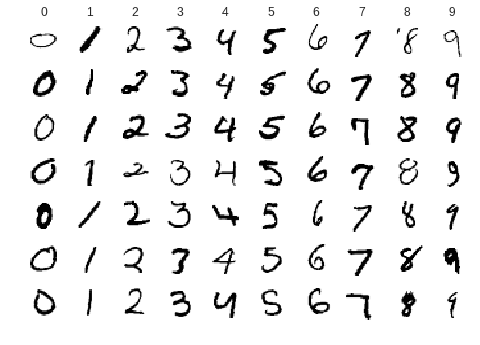

In [0]:
# visualize some data
import matplotlib.pyplot as plt

num_classes = 10
samples_per_class = 7
for y in np.arange(num_classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(str(y))
plt.show()

In [0]:
# set some parameters
# Parameters
learning_rate = 0.01
num_steps = 5000
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)


In [0]:
# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [0]:
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Activation
    layer_1_activation = tf.nn.relu(layer_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1_activation, weights['h2']), biases['b2'])
    # Activation
    layer_2_activation = tf.nn.relu(layer_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2_activation, weights['out']) + biases['out']
    return out_layer

In [0]:
# Construct model
logits = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))

Step 1, Minibatch Loss= 1357.8413, Training Accuracy= 0.227
Step 100, Minibatch Loss= 40.8588, Training Accuracy= 0.875
Step 200, Minibatch Loss= 20.3510, Training Accuracy= 0.867
Step 300, Minibatch Loss= 12.3565, Training Accuracy= 0.945
Step 400, Minibatch Loss= 13.7329, Training Accuracy= 0.922
Step 500, Minibatch Loss= 12.3368, Training Accuracy= 0.898
Step 600, Minibatch Loss= 17.8649, Training Accuracy= 0.914
Step 700, Minibatch Loss= 8.0571, Training Accuracy= 0.953
Step 800, Minibatch Loss= 0.6796, Training Accuracy= 0.977
Step 900, Minibatch Loss= 7.0665, Training Accuracy= 0.922
Step 1000, Minibatch Loss= 3.9133, Training Accuracy= 0.938
Step 1100, Minibatch Loss= 0.0811, Training Accuracy= 0.992
Step 1200, Minibatch Loss= 6.9212, Training Accuracy= 0.953
Step 1300, Minibatch Loss= 0.6677, Training Accuracy= 0.984
Step 1400, Minibatch Loss= 4.2606, Training Accuracy= 0.969
Step 1500, Minibatch Loss= 3.6719, Training Accuracy= 0.953
Step 1600, Minibatch Loss= 4.3428, Training